# =============================================================
# MILESTONE 1: Data Collection, Exploration, and Preprocessing
# =============================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path

# -------------------------------
# 1. CONFIG
# -------------------------------

In [4]:
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

DATA_PATH = "../data/raw/merged_churn_data.csv"
VIZ_DIR = "../visualizations/static"
Path(VIZ_DIR).mkdir(parents=True, exist_ok=True)

# -------------------------------
# 2. LOAD DATA
# -------------------------------

In [5]:
df = pd.read_csv(DATA_PATH)
print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns\n")

Dataset: 3,333 rows × 20 columns



# -------------------------------
# 3. DATA STRUCTURE & QUALITY
# -------------------------------

In [8]:
df_before = df.copy()

In [10]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
missing = df.isnull().sum()
print(missing[missing > 0])
print(f"Total missing: {missing.sum():,}")

Series([], dtype: int64)
Total missing: 0


In [12]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed duplicates → {df.shape[0]:,} rows")

Duplicate rows: 0


In [44]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print(churn_dist.map("{:.2f}%".format))

Churn
False    85.51%
True     14.49%
Name: proportion, dtype: object


# -------------------------------
# 4. VISUALIZATIONS
# -------------------------------

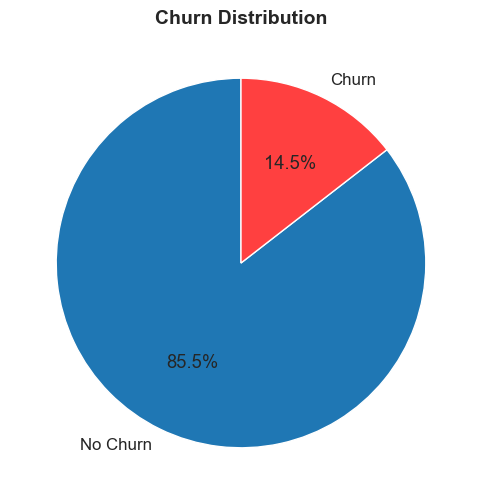

Saved: ../visualizations/static\01_churn_pie.png


In [14]:
# 1. Churn Pie Chart
plt.figure(figsize=(6, 6))
colors = ['#1f77b4', '#ff4040']
plt.pie(df['Churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
path = os.path.join(VIZ_DIR, "01_churn_pie.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

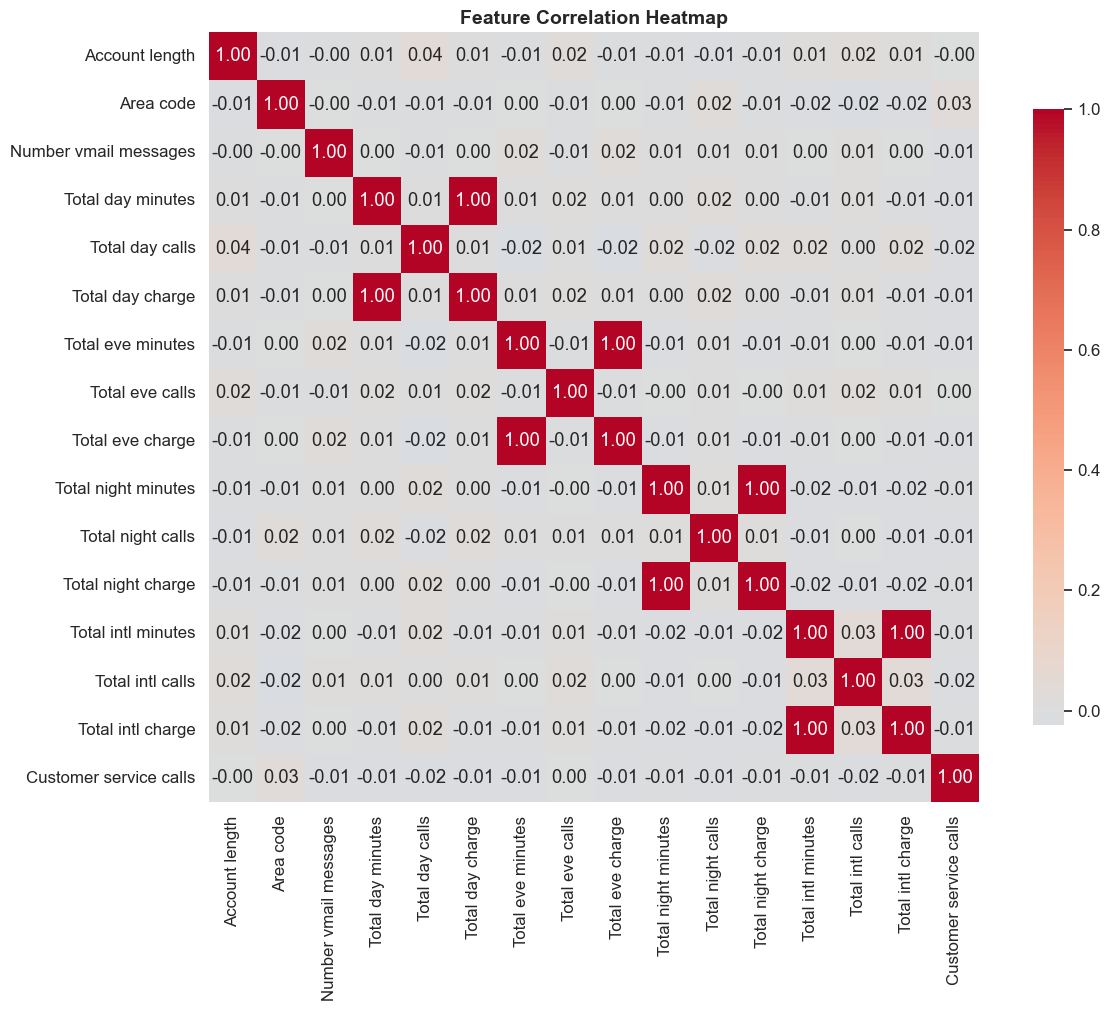

Saved: ../visualizations/static\02_correlation_heatmap.png


In [15]:
# 2. Correlation Heatmap (Numerical)
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
path = os.path.join(VIZ_DIR, "02_correlation_heatmap.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

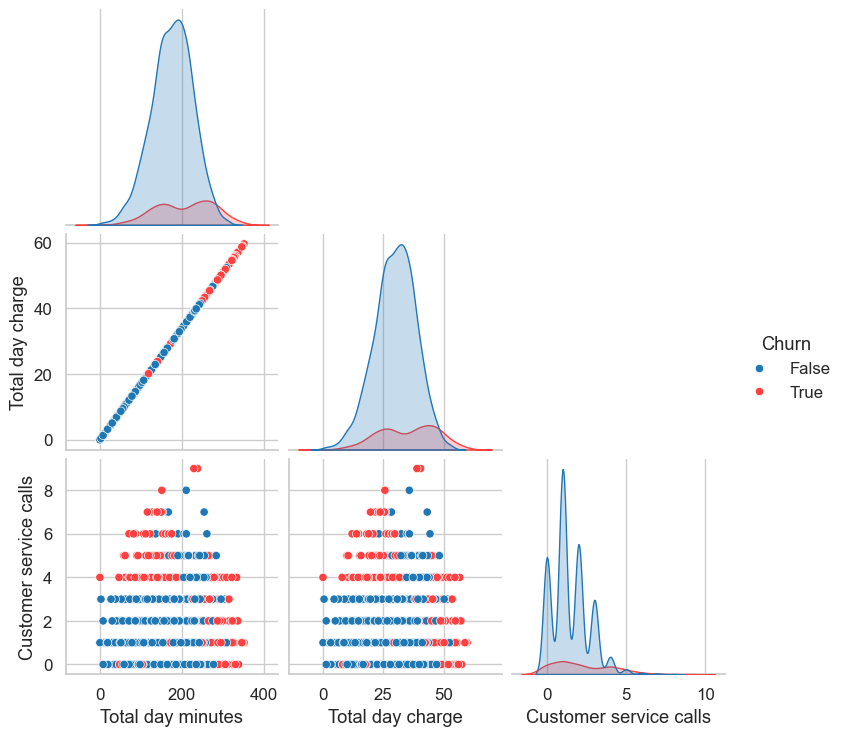

Saved: ../visualizations/static\03_pairplot_key_features.png


In [16]:
# 3. Pairplot (Key Features)
key_features = ['Total day minutes', 'Total day charge', 'Customer service calls', 'Churn']
sns.pairplot(df[key_features], hue='Churn', palette={False: '#1f77b4', True: '#ff4040'}, corner=True)
path = os.path.join(VIZ_DIR, "03_pairplot_key_features.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

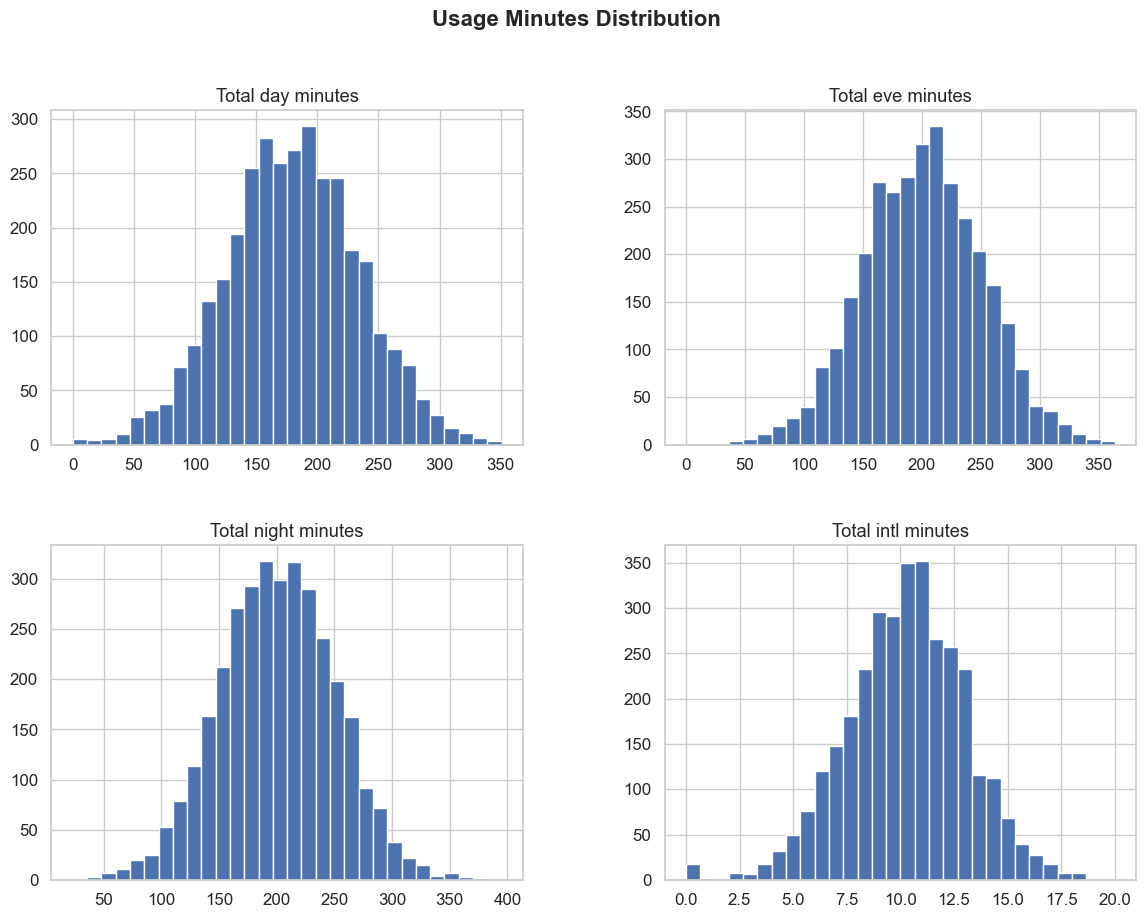

Saved: ../visualizations/static\04_usage_histograms.png


In [17]:
# 4. Histograms: Usage Patterns
usage_cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
df[usage_cols].hist(bins=30, figsize=(14, 10), color='#4c72b0', edgecolor='white')
plt.suptitle('Usage Minutes Distribution', fontsize=16, fontweight='bold')
path = os.path.join(VIZ_DIR, "04_usage_histograms.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8492\3642083686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8492\3642083686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8492\3642083686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8492\3642083686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

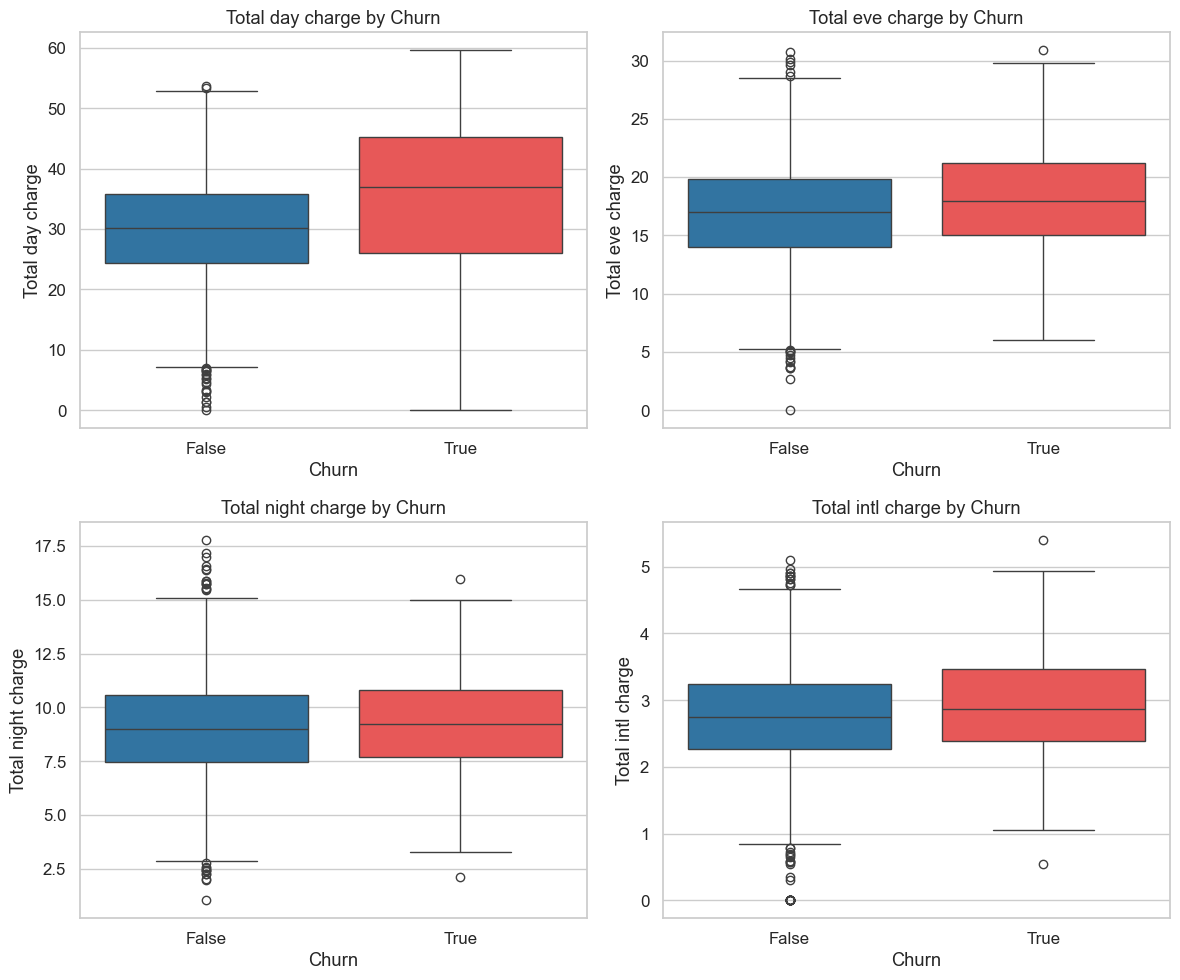

Saved: ../visualizations/static\05_charge_boxplots.png


In [23]:
# 5. Boxplots: Charges by Churn
charge_cols = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for i, col in enumerate(charge_cols):
    sns.boxplot(
    data=df,
    x='Churn',
    y=col,
    ax=axes[i],
    palette={'False': '#1f77b4', 'True': '#ff4040'}
)
    axes[i].set_title(f'{col} by Churn')
plt.tight_layout()
path = os.path.join(VIZ_DIR, "05_charge_boxplots.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8492\291955259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_churn.index, y=state_churn.values, palette='viridis')


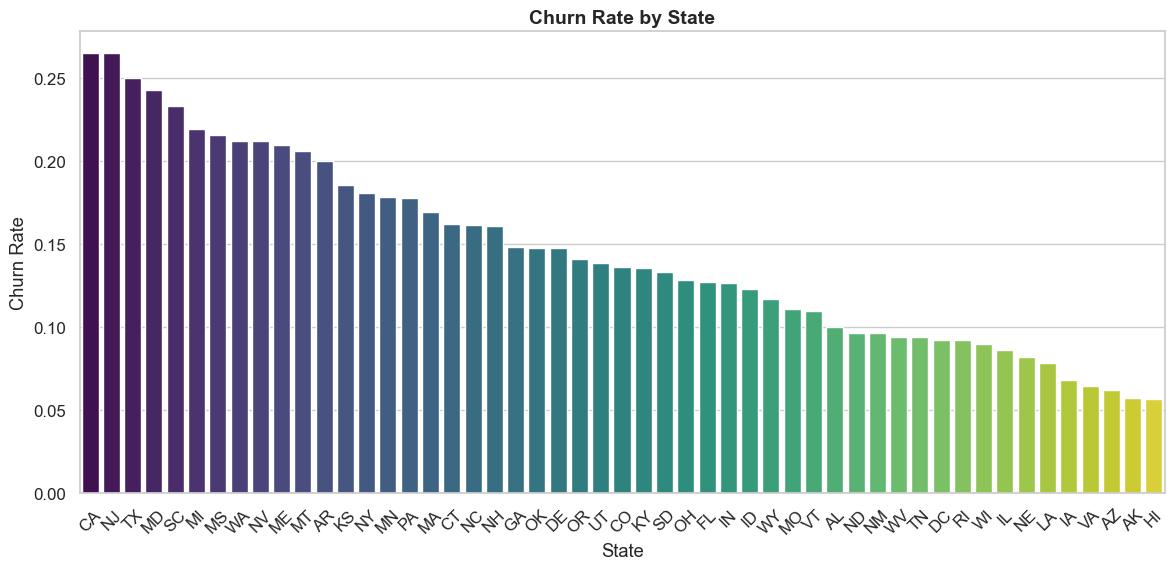

Saved: ../visualizations/static\06_state_churn_rate.png


In [20]:
# 6. Categorical: State Churn Rate
state_churn = df.groupby('State')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=state_churn.index, y=state_churn.values, palette='viridis')
plt.title('Churn Rate by State', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Churn Rate')
path = os.path.join(VIZ_DIR, "06_state_churn_rate.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

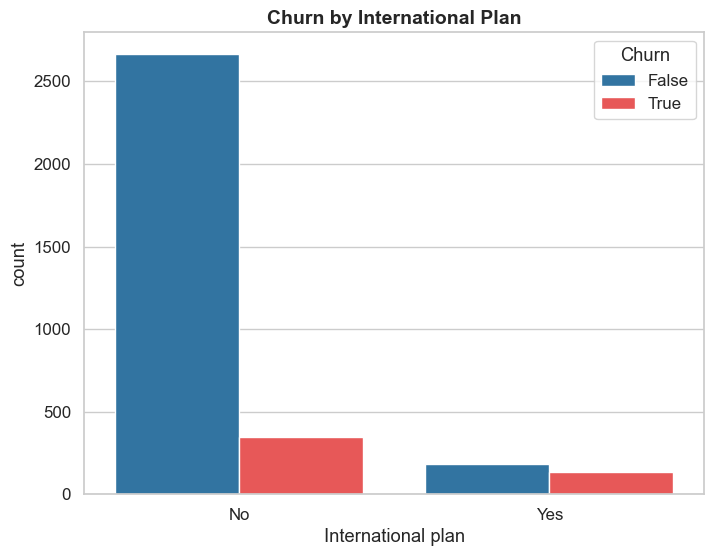

Saved: ../visualizations/static\07_intl_plan_churn.png


In [21]:
# 7. International Plan Impact
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='International plan', hue='Churn', palette={False: '#1f77b4', True: '#ff4040'})
plt.title('Churn by International Plan', fontsize=14, fontweight='bold')
path = os.path.join(VIZ_DIR, "07_intl_plan_churn.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")

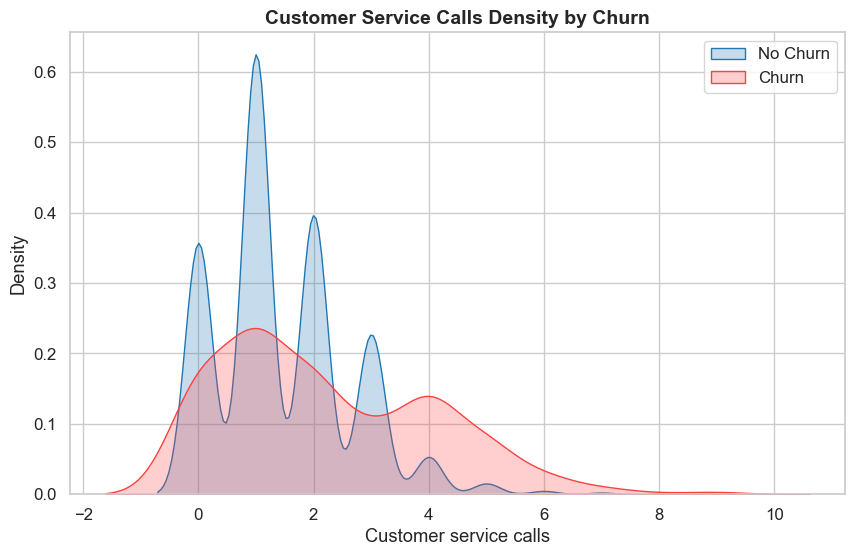

Saved: ../visualizations/static\08_svc_calls_density.png


In [22]:
# 8. Customer Service Calls
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == False], x='Customer service calls', fill=True, label='No Churn', color='#1f77b4')
sns.kdeplot(data=df[df['Churn'] == True], x='Customer service calls', fill=True, label='Churn', color='#ff4040')
plt.title('Customer Service Calls Density by Churn', fontsize=14, fontweight='bold')
plt.legend()
path = os.path.join(VIZ_DIR, "08_svc_calls_density.png")
plt.savefig(path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {path}")